In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
# df_events información de eventos realizado en la plataforma para un conjunto de usuarios hasta el 31/05/2018
df_events = pd.read_csv('../../data/events_up_to_01062018.csv',dtype=object)
# df_train archivo labels_training_set.csv indica para un subconjunto de los usuarios incluidos en el set de 
# eventos events_up_to_01062018.csv si los mismos realizaron una conversión (columna label = 1) o no (columna 
# label = 0) desde el 01/06/2018 hasta el 15/06/2018
df_labels = pd.read_csv('../../data/labels_training_set.csv',dtype=object)
# Personas a predecir conversion.
df_person = pd.read_csv('../../data/trocafone_kaggle_test.csv')

In [3]:
# Me quedo solo con los users que tienen label.
df_events = pd.merge(df_events,df_labels,on = 'person',how = 'inner')

In [4]:
df_events["timestamp"] = pd.to_datetime(df_events["timestamp"])
df_events["month"] = df_events["timestamp"].dt.month
df_events["day"] = df_events["timestamp"].dt.day
df_events["day_of_week"] = df_events['timestamp'].dt.weekday_name
df_events['day_of_year'] = df_events['timestamp'].dt.dayofyear
df_events['hour'] = df_events['timestamp'].dt.hour
df_events['minute'] = df_events['timestamp'].dt.minute
df_events['week_of_year'] = df_events['timestamp'].dt.weekofyear

In [5]:
viewed_product = df_events[df_events['event'] == 'viewed product']
brand_listing    = df_events[df_events['event'] == 'brand listing']
visited_site =  df_events[df_events['event'] == 'visited site']
ad_campaign_hit = df_events[df_events['event'] == 'ad campaign hit']
generic_listing = df_events[df_events['event'] == 'generic listing']
searched_products = df_events[df_events['event'] == 'searched products']
search_engine_hit = df_events[df_events['event'] == 'search engine hit']
checkout = df_events[df_events['event'] == 'checkout']
staticpage = df_events[df_events['event'] == 'staticpage']
conversion = df_events[df_events['event'] == 'conversion']
lead = df_events[df_events['event'] == 'lead']

In [18]:
df_events.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1171886 entries, 0 to 1171885
Data columns (total 31 columns):
timestamp                   1171886 non-null datetime64[ns]
event                       1171886 non-null object
person                      1171886 non-null object
url                         94875 non-null object
sku                         665336 non-null object
model                       665767 non-null object
condition                   665336 non-null object
storage                     665336 non-null object
color                       665336 non-null object
skus                        249587 non-null object
search_term                 55774 non-null object
staticpage                  5660 non-null object
campaign_source             94940 non-null object
search_engine               52829 non-null object
channel                     102299 non-null object
new_vs_returning            102299 non-null object
city                        102299 non-null object
region         

In [19]:
df_positive = df_events[df_events['label'] == '1']
df_negative = df_events[df_events['label'] == '0']

In [20]:
# Cantidad de veces que hace un evento

In [21]:
top_pos = df_positive['event'].value_counts(normalize = True).head(20)
top_neg = df_negative['event'].value_counts(normalize = True).head(20)

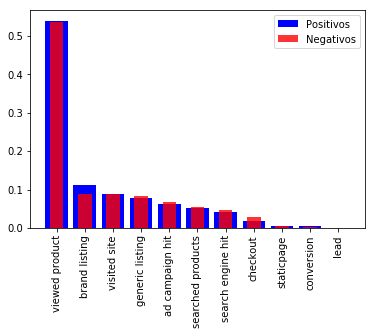

In [22]:
width = 0.8
indices = np.arange(len(top_pos.index))
plt.bar(indices,top_pos.values,width = width, color = 'b',label = 'Positivos')
plt.bar(indices,top_neg.values,width = 0.6*width, color = 'r',label = 'Negativos',alpha = 0.8)
plt.xticks(indices, top_pos.index,rotation = 'vertical')
plt.legend()
plt.show()

Se puede ver que no hay mucha diferencia, excepto en los eventos brand listing, checkout y quizas ad campaign hit, generic listing y search engine hit.

### model - viewed product

In [16]:
# Cantidad de visitas a cada modelo.

In [62]:
a = viewed_product[['model','label','event']].groupby(['model','label']).count().unstack()
a.columns = ['neg','pos']
a['neg'] = a['neg'] / a['neg'].sum()
a['pos'] = a['pos'] / a['pos'].sum()
a['dif'] = np.abs(a['pos'] - a['neg'])
a.sort_values('dif',ascending = False, inplace = True)

In [63]:
a.head(15)

,neg,pos,dif
model,,,
iPhone 6S Plus,0.030800,0.019991,0.010808
iPhone 7 Plus,0.034755,0.024455,0.010300
iPhone 6 Plus,0.024806,0.015696,0.009111
iPhone 6S,0.074426,0.065516,0.008910
Samsung Galaxy S7 Edge,0.037426,0.046269,0.008843
Samsung Galaxy S6 Flat,0.019730,0.028304,0.008574
iPhone SE,0.028886,0.020717,0.008170
Samsung Galaxy S6 Edge,0.024452,0.031521,0.007070
iPhone 5s,0.078132,0.071895,0.006237


In [65]:
a.head(15).index

Index(['iPhone 6S Plus', 'iPhone 7 Plus', 'iPhone 6 Plus', 'iPhone 6S',
       'Samsung Galaxy S7 Edge', 'Samsung Galaxy S6 Flat', 'iPhone SE',
       'Samsung Galaxy S6 Edge', 'iPhone 5s', 'Samsung Galaxy S5',
       'Samsung Galaxy J5', 'iPhone 6', 'Samsung Galaxy A7 2017', 'iPhone 5c',
       'Samsung Galaxy J7 2016 Metal'],
      dtype='object', name='model')

### model - checkout

In [17]:
# Cantidad de checkout de modelos.

In [66]:
a = checkout[['model','label','event']].groupby(['model','label']).count().unstack()
a.columns = ['neg','pos']
a['neg'] = a['neg'] / a['neg'].sum()
a['pos'] = a['pos'] / a['pos'].sum()
a['dif'] = np.abs(a['pos'] - a['neg'])
a.sort_values('dif',ascending = False, inplace = True)

In [67]:
a.head(15)

,neg,pos,dif
model,,,
iPhone 6S,0.069319,0.033389,0.035930
Samsung Galaxy J5,0.055722,0.027824,0.027898
Samsung Galaxy J7 Prime,0.031293,0.011686,0.019607
iPhone 7 Plus,0.030317,0.013912,0.016405
iPhone 4G,0.005985,0.021146,0.015161
Samsung Galaxy On 7,0.000976,0.015582,0.014606
Motorola Moto X Play 4G Dual,0.006668,0.020033,0.013365
Samsung Galaxy J7 2016 Metal,0.005725,0.018364,0.012639
iPhone 7,0.028560,0.016694,0.011866


In [69]:
a.head(15).index

Index(['iPhone 6S', 'Samsung Galaxy J5', 'Samsung Galaxy J7 Prime',
       'iPhone 7 Plus', 'iPhone 4G', 'Samsung Galaxy On 7',
       'Motorola Moto X Play 4G Dual', 'Samsung Galaxy J7 2016 Metal',
       'iPhone 7', 'Motorola Moto X2', 'Samsung Galaxy S7', 'iPhone 4S',
       'Lenovo Vibe A7010 Dual Chip', 'Motorola Moto G4 Plus', 'iPhone 5s'],
      dtype='object', name='model')

### color - viewed product

In [17]:
# Cantidad de visitas a productos segun color.

In [ ]:
viewed_product.count()

In [55]:
a = viewed_product[['color','label','event']].groupby(['color','label']).count().unstack()
a.columns = ['neg','pos']
a['neg'] = a['neg'] / a['neg'].sum()
a['pos'] = a['pos'] / a['pos'].sum()
a['dif'] = np.abs(a['pos'] - a['neg'])
a.sort_values('dif',ascending = False, inplace = True)

In [60]:
a.head(15)

,neg,pos,dif
color,,,
Cinza espacial,0.115826,0.094229,0.021596
Preto,0.237603,0.257769,0.020166
Branco,0.094432,0.110130,0.015697
Prateado,0.088470,0.075019,0.013451
Ouro Rosa,0.061566,0.048575,0.012992
Prata,0.027274,0.033679,0.006405
Rosa,0.032989,0.036171,0.003181
Dourado,0.205486,0.208209,0.002723
Azul,0.014946,0.017035,0.002088


In [59]:
a.head(15).index

Index(['Cinza espacial', 'Preto', 'Branco', 'Prateado', 'Ouro Rosa', 'Prata',
       'Rosa', 'Dourado', 'Azul', 'Ametista', 'Cinza', 'Preto Matte', 'Verde',
       'Vermelho', 'Preto Brilhante'],
      dtype='object', name='color')

### region - visited site

In [71]:
# Visito la pagina desde region

In [74]:
a = visited_site[['region','label','event']].groupby(['region','label']).count().unstack()
a.columns = ['neg','pos']
a['neg'] = a['neg'] / a['neg'].sum()
a['pos'] = a['pos'] / a['pos'].sum()
a['dif'] = np.abs(a['pos'] - a['neg'])
a.sort_values('dif',ascending = False, inplace = True)
a.head(15)

,neg,pos,dif
region,,,
Pernambuco,0.032044,0.058810,0.026766
Sao Paulo,0.281187,0.262350,0.018837
Minas Gerais,0.094032,0.111460,0.017427
Espirito Santo,0.020017,0.036294,0.016278
Bahia,0.073127,0.060491,0.012636
Para,0.013794,0.025877,0.012082
Parana,0.029913,0.020836,0.009077
Paraíba,0.011524,0.002464,0.009059
Piaui,0.007486,0.016243,0.008757


In [75]:
a.head(15).index

Index(['Pernambuco', 'Sao Paulo', 'Minas Gerais', 'Espirito Santo', 'Bahia',
       'Para', 'Parana', 'Paraíba', 'Piaui', 'Rio de Janeiro', 'Maranhao',
       'Alagoas', 'Ceara', 'Santa Catarina', 'Rio Grande do Sul'],
      dtype='object', name='region')

### screen resolution - visited site

In [78]:
# Visito la pagina con resolucion

In [79]:
a = visited_site[['screen_resolution','label','event']].groupby(['screen_resolution','label']).count().unstack()
a.columns = ['neg','pos']
a['neg'] = a['neg'] / a['neg'].sum()
a['pos'] = a['pos'] / a['pos'].sum()
a['dif'] = np.abs(a['pos'] - a['neg'])
a.sort_values('dif',ascending = False, inplace = True)
a.head(15)

,neg,pos,dif
screen_resolution,,,
360x640,0.376798,0.296325,0.080473
1366x768,0.234784,0.274927,0.040143
320x570,0.024419,0.045709,0.021290
1600x900,0.026978,0.042796,0.015818
320x534,0.038781,0.023975,0.014806
1280x1024,0.020124,0.029464,0.009340
412x732,0.008975,0.000560,0.008415
375x667,0.011802,0.004929,0.006873
414x736,0.002003,0.008402,0.006400


In [80]:
a.head(15).index

Index(['360x640', '1366x768', '320x570', '1600x900', '320x534', '1280x1024',
       '412x732', '375x667', '414x736', '320x490', '1536x864', '320x569',
       '1920x1080', '1024x768', '1324x745'],
      dtype='object', name='screen_resolution')

### operating system version  - visited site

In [78]:
# Visito la pagina con operating system version

In [81]:
a = visited_site[['operating_system_version','label','event']].groupby(['operating_system_version','label']).count().unstack()
a.columns = ['neg','pos']
a['neg'] = a['neg'] / a['neg'].sum()
a['pos'] = a['pos'] / a['pos'].sum()
a['dif'] = np.abs(a['pos'] - a['neg'])
a.sort_values('dif',ascending = False, inplace = True)
a.head(15)

,neg,pos,dif
operating_system_version,,,
Android 7,0.116202,0.064187,0.052015
Windows 7,0.217517,0.257981,0.040464
Windows 10,0.186716,0.227064,0.040348
Android 5.1,0.014983,0.044808,0.029825
Android 6.0.1,0.107613,0.083791,0.023822
Android 7.1.1,0.041244,0.020836,0.020408
Android 5.0.2,0.020092,0.036294,0.016203
Android 6,0.076522,0.063851,0.012671
Android 4.4.2,0.017018,0.010642,0.006376


In [84]:
a.head(15).index

Index(['Android 7', 'Windows 7 ', 'Windows 10 ', 'Android 5.1',
       'Android 6.0.1', 'Android 7.1.1', 'Android 5.0.2', 'Android 6',
       'Android 4.4.2', 'iOS 11.2.6', 'Windows Phone 8.1', 'Android 4.1.2',
       'Windows Vista ', 'iOS 10.3.3', 'Android 8'],
      dtype='object', name='operating_system_version')

### browser version  - visited site

In [85]:
# Visito la pagina con browser version

In [86]:
a = visited_site[['browser_version','label','event']].groupby(['browser_version','label']).count().unstack()
a.columns = ['neg','pos']
a['neg'] = a['neg'] / a['neg'].sum()
a['pos'] = a['pos'] / a['pos'].sum()
a['dif'] = np.abs(a['pos'] - a['neg'])
a.sort_values('dif',ascending = False, inplace = True)
a.head(15)

,neg,pos,dif
browser_version,,,
Chrome Mobile 66.0,0.235734,0.147418,0.088317
Chrome 65.0,0.069646,0.123894,0.054248
Chrome 66.0,0.278842,0.248684,0.030158
Chrome 64.0,0.027492,0.048168,0.020676
Chrome 63.0,0.018732,0.030917,0.012186
Chrome Mobile 65.0,0.077646,0.088944,0.011297
Chrome Mobile 64.0,0.038727,0.049737,0.011010
Chrome Mobile 39,0.010903,0.000112,0.010791
Chrome Mobile 63.0,0.020531,0.028005,0.007474


In [87]:
a.head(15).index

Index(['Chrome Mobile 66.0', 'Chrome 65.0', 'Chrome 66.0', 'Chrome 64.0',
       'Chrome 63.0', 'Chrome Mobile 65.0', 'Chrome Mobile 64.0',
       'Chrome Mobile 39', 'Chrome Mobile 63.0', 'Samsung Internet 3.3',
       'Samsung Internet 6.4', 'Mobile Safari 11', 'IE Mobile 11',
       'Edge 16.16299', 'Chrome Mobile 36.0'],
      dtype='object', name='browser_version')

### campaign source - ad campaign hit

In [88]:
# Accedio por campaña publicitaria.

In [89]:
a = ad_campaign_hit[['campaign_source','label','event']].groupby(['campaign_source','label']).count().unstack()
a.columns = ['neg','pos']
a['neg'] = a['neg'] / a['neg'].sum()
a['pos'] = a['pos'] / a['pos'].sum()
a['dif'] = np.abs(a['pos'] - a['neg'])
a.sort_values('dif',ascending = False, inplace = True)

In [91]:
ad_campaign_hit['campaign_source'].value_counts()

google              60993
criteo              12669
rtbhouse            11624
zanox                3320
emblue               1851
manifest              877
afilio                862
FacebookAds           687
voxus                 484
rakuten               446
bing                  416
datacrush             207
buscape               146
indexa                140
Facebook               81
afiliado               42
blog                   28
mercadopago            23
yotpo                  17
onsite                 10
FacebookSocial         10
gizmodo                 4
MARKETING SOCIAL        3
Name: campaign_source, dtype: int64

In [90]:
a.head(15)

,neg,pos,dif
campaign_source,,,
rtbhouse,0.120894,0.144718,0.023824
criteo,0.134836,0.113300,0.021536
google,0.641531,0.655543,0.014012
zanox,0.035564,0.026371,0.009193
manifest,0.009798,0.001140,0.008658
bing,0.004110,0.008302,0.004192
afilio,0.009347,0.005209,0.004138
buscape,0.001408,0.003419,0.002011
rakuten,0.004809,0.003093,0.001716


In [96]:
a.head(15).index

Index(['rtbhouse', 'criteo', 'google', 'zanox', 'manifest', 'bing', 'afilio',
       'buscape', 'rakuten', 'FacebookAds', 'indexa', 'datacrush', 'emblue',
       'blog', 'yotpo'],
      dtype='object', name='campaign_source')

In [20]:
# Cantidad de veces que hace un evento en mes.

In [23]:
top_pos = df_positive['month'].value_counts(normalize = True).head(20)
top_neg = df_negative['month'].value_counts(normalize = True).head(20)

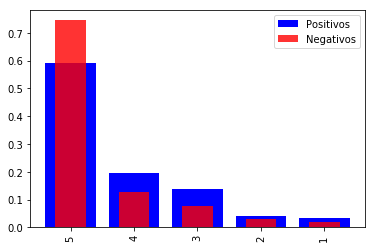

In [24]:
width = 0.8
indices = np.arange(len(top_pos.index))
plt.bar(indices,top_pos.values,width = width, color = 'b',label = 'Positivos')
plt.bar(indices,top_neg.values,width = 0.6*width, color = 'r',label = 'Negativos',alpha = 0.8)
plt.xticks(indices, top_pos.index,rotation = 'vertical')
plt.legend()
plt.show()

In [31]:
# Cantidad de veces que hace un evento en dia del mes.

In [32]:
top_pos = df_positive['day'].value_counts(normalize = True)
top_neg = df_negative['day'].value_counts(normalize = True)

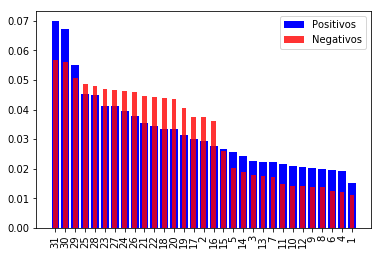

In [33]:
width = 0.8
indices = np.arange(len(top_pos.index))
plt.bar(indices,top_pos.values,width = width, color = 'b',label = 'Positivos')
plt.bar(indices,top_neg.values,width = 0.6*width, color = 'r',label = 'Negativos',alpha = 0.8)
plt.xticks(indices, top_pos.index,rotation = 'vertical')
plt.legend()
plt.show()

In [20]:
# Cantidad de veces que hace un evento en dia de semana.

In [29]:
top_pos = df_positive['day_of_week'].value_counts(normalize = True)
top_neg = df_negative['day_of_week'].value_counts(normalize = True)

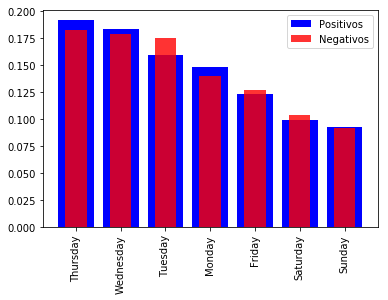

In [30]:
width = 0.8
indices = np.arange(len(top_pos.index))
plt.bar(indices,top_pos.values,width = width, color = 'b',label = 'Positivos')
plt.bar(indices,top_neg.values,width = 0.6*width, color = 'r',label = 'Negativos',alpha = 0.8)
plt.xticks(indices, top_pos.index,rotation = 'vertical')
plt.legend()
plt.show()

In [34]:
# Cantidad de veces que hace un evento en dia del año.

In [39]:
top_pos = df_positive['day_of_year'].value_counts(normalize = True).head(20)
top_neg = df_negative['day_of_year'].value_counts(normalize = True).head(20)

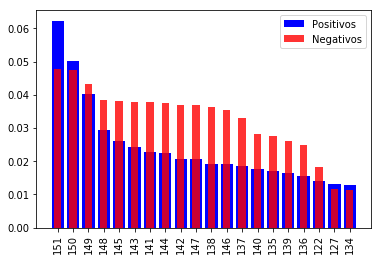

In [40]:
width = 0.8
indices = np.arange(len(top_pos.index))
plt.bar(indices,top_pos.values,width = width, color = 'b',label = 'Positivos')
plt.bar(indices,top_neg.values,width = 0.6*width, color = 'r',label = 'Negativos',alpha = 0.8)
plt.xticks(indices, top_pos.index,rotation = 'vertical')
plt.legend()
plt.show()

In [34]:
# Cantidad de veces que hace un evento en hora.

In [41]:
top_pos = df_positive['hour'].value_counts(normalize = True).head(20)
top_neg = df_negative['hour'].value_counts(normalize = True).head(20)

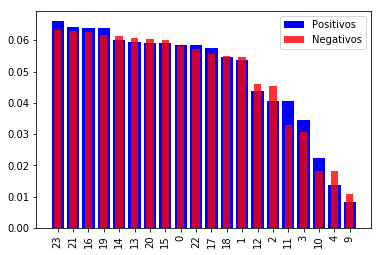

In [42]:
width = 0.8
indices = np.arange(len(top_pos.index))
plt.bar(indices,top_pos.values,width = width, color = 'b',label = 'Positivos')
plt.bar(indices,top_neg.values,width = 0.6*width, color = 'r',label = 'Negativos',alpha = 0.8)
plt.xticks(indices, top_pos.index,rotation = 'vertical')
plt.legend()
plt.show()

In [34]:
# Cantidad de veces que hace un evento en minuto.

In [43]:
top_pos = df_positive['minute'].value_counts(normalize = True).head(20)
top_neg = df_negative['minute'].value_counts(normalize = True).head(20)

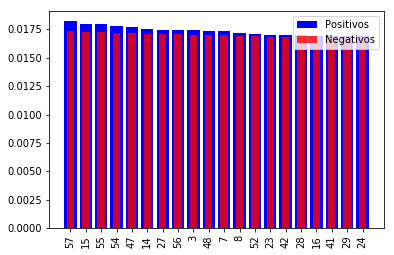

In [44]:
width = 0.8
indices = np.arange(len(top_pos.index))
plt.bar(indices,top_pos.values,width = width, color = 'b',label = 'Positivos')
plt.bar(indices,top_neg.values,width = 0.6*width, color = 'r',label = 'Negativos',alpha = 0.8)
plt.xticks(indices, top_pos.index,rotation = 'vertical')
plt.legend()
plt.show()

In [34]:
# Cantidad de veces que hace un evento en semana del año.

In [82]:
top_pos = df_positive['week_of_year'].value_counts(normalize = True).head(20)
top_neg = df_negative['week_of_year'].value_counts(normalize = True).head(20)

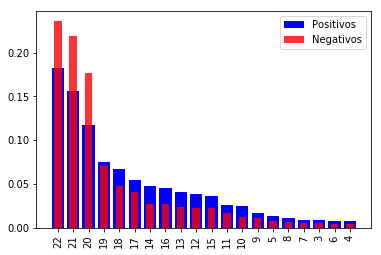

In [83]:
width = 0.8
indices = np.arange(len(top_pos.index))
plt.bar(indices,top_pos.values,width = width, color = 'b',label = 'Positivos')
plt.bar(indices,top_neg.values,width = 0.6*width, color = 'r',label = 'Negativos',alpha = 0.8)
plt.xticks(indices, top_pos.index,rotation = 'vertical')
plt.legend()
plt.show()

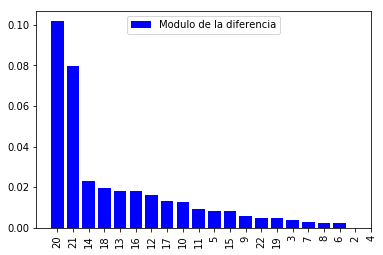

In [85]:
diferencia = np.abs(top_pos - top_neg).sort_values(ascending = False)
width = 0.8
indices = np.arange(len(diferencia.index))
plt.bar(indices,diferencia.values,width = width, color = 'b',label = 'Modulo de la diferencia')
plt.xticks(indices, diferencia.index,rotation = 'vertical')
plt.legend()
plt.show()

In [ ]:
diferencia = np.abs(top_pos - top_neg).sort_values(ascending = False)
width = 0.8
indices = np.arange(len(diferencia.index))
plt.bar(indices,diferencia.values,width = width, color = 'b',label = 'Positivos')
plt.xticks(indices, diferencia.index,rotation = 'vertical')
plt.legend()
plt.show()

In [34]:
# Device type

In [58]:
top_pos = df_positive['device_type'].value_counts(normalize = True)
top_neg = df_negative['device_type'].value_counts(normalize = True).head(3)

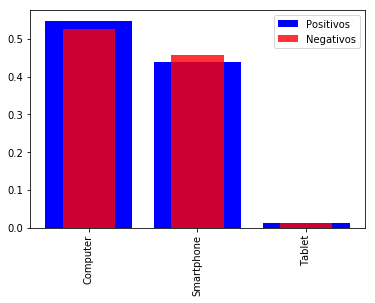

In [59]:
width = 0.8
indices = np.arange(len(top_pos.index))
plt.bar(indices,top_pos.values,width = width, color = 'b',label = 'Positivos')
plt.bar(indices,top_neg.values,width = 0.6*width, color = 'r',label = 'Negativos',alpha = 0.8)
plt.xticks(indices, top_pos.index,rotation = 'vertical')
plt.legend()
plt.show()

In [34]:
# Ciudad

In [65]:
top_pos = df_positive['city'].value_counts(normalize = True).head(30)
top_neg = df_negative['city'].value_counts(normalize = True).head(30)

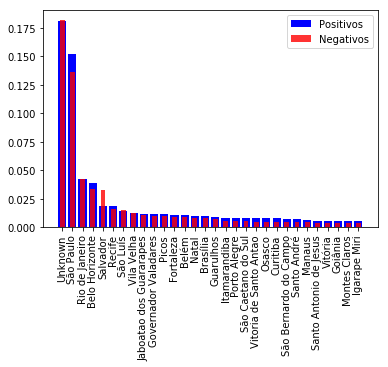

In [66]:
width = 0.8
indices = np.arange(len(top_pos.index))
plt.bar(indices,top_pos.values,width = width, color = 'b',label = 'Positivos')
plt.bar(indices,top_neg.values,width = 0.6*width, color = 'r',label = 'Negativos',alpha = 0.8)
plt.xticks(indices, top_pos.index,rotation = 'vertical')
plt.legend()
plt.show()

In [34]:
# Region

In [67]:
top_pos = df_positive['region'].value_counts(normalize = True).head(30)
top_neg = df_negative['region'].value_counts(normalize = True).head(30)

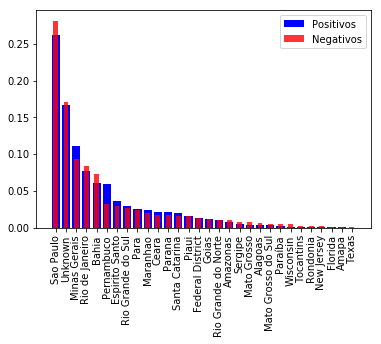

In [68]:
width = 0.8
indices = np.arange(len(top_pos.index))
plt.bar(indices,top_pos.values,width = width, color = 'b',label = 'Positivos')
plt.bar(indices,top_neg.values,width = 0.6*width, color = 'r',label = 'Negativos',alpha = 0.8)
plt.xticks(indices, top_pos.index,rotation = 'vertical')
plt.legend()
plt.show()

In [34]:
# Screen resolution

In [88]:
top_pos = df_positive['screen_resolution'].value_counts(normalize = True).head(15)
top_neg = df_negative['screen_resolution'].value_counts(normalize = True).head(15)

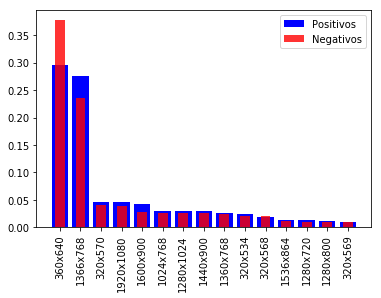

In [89]:
width = 0.8
indices = np.arange(len(top_pos.index))
plt.bar(indices,top_pos.values,width = width, color = 'b',label = 'Positivos')
plt.bar(indices,top_neg.values,width = 0.6*width, color = 'r',label = 'Negativos',alpha = 0.8)
plt.xticks(indices, top_pos.index,rotation = 'vertical')
plt.legend()
plt.show()

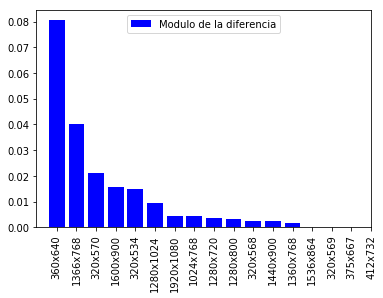

In [90]:
diferencia = np.abs(top_pos - top_neg).sort_values(ascending = False)
width = 0.8
indices = np.arange(len(diferencia.index))
plt.bar(indices,diferencia.values,width = width, color = 'b',label = 'Modulo de la diferencia')
plt.xticks(indices, diferencia.index,rotation = 'vertical')
plt.legend()
plt.show()

In [ ]:

# GRAFICO DE LINEA..
(ad_campaign_hit.loc[ad_campaign_hit['campaign_source'] == 'google']).groupby('timestamp_dayofyear')\
                .count().loc[:,'event'].plot(linewidth=2,figsize=(8,4),label = 'Google')
(ad_campaign_hit.loc[ad_campaign_hit['campaign_source'] == 'zanox']).groupby('timestamp_dayofyear')\
                .count().loc[:,'event'].plot(linewidth=2,figsize=(8,4), label = 'Zanox')
(ad_campaign_hit.loc[ad_campaign_hit['campaign_source'] == 'criteo']).groupby('timestamp_dayofyear')\
                .count().loc[:,'event'].plot(linewidth=2,figsize=(8,4), label = 'Criteo')
(ad_campaign_hit.loc[ad_campaign_hit['campaign_source'] == 'rtbhouse']).groupby('timestamp_dayofyear')\
                .count().loc[:,'event'].plot(linewidth=2,figsize=(8,4), label = 'Rtbhouse')
(ad_campaign_hit.loc[ad_campaign_hit['campaign_source'] == 'emblue']).groupby('timestamp_dayofyear')\
                .count().loc[:,'event'].plot(linewidth=2,figsize=(8,4), label = 'Emblue')

plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
plt.ylabel('Cantidad de clicks')
plt.xlabel('Día del año')
plt.title('Cantidad de clicks en el top5 de publiciades según los días del año')